In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
os.chdir('E:/req files')

In [20]:
stock=pd.read_csv('walmart_stock.csv')

In [21]:
drop_col=['Open','Low','Adj Close']
stock=stock.drop(drop_col,axis=1)

In [22]:
stock.columns

Index(['Date', 'High', 'Close', 'Volume'], dtype='object')

In [23]:
stock=stock.drop_duplicates(keep='first')

In [24]:
stock.shape

(1258, 4)

In [25]:
stock.describe()

,High,Close,Volume
count,1258.000000,1258.000000,1.258000e+03
mean,72.839388,72.388450,8.222093e+06
std,6.768187,6.756859,4.519781e+06
min,57.060001,56.419998,2.094900e+06
25%,69.059998,68.632497,5.791100e+06
50%,73.725002,73.265000,7.093500e+06
75%,77.094999,76.709999,9.394675e+06
max,90.970001,90.470001,8.089810e+07


In [26]:
stock_sort=stock.sort_values(by='Date',ascending='False')
stock_sort.head()

,Date,High,Close,Volume
0,2012-01-03,61.060001,60.330002,12668800
1,2012-01-04,60.349998,59.709999,9593300
2,2012-01-05,59.619999,59.419998,12768200
3,2012-01-06,59.450001,59.000000,8069400
4,2012-01-09,59.549999,59.180000,6679300


In [27]:
stock['Date'] = pd.to_datetime(stock.Date)
stock.Date.dtypes

dtype('<M8[ns]')

In [11]:
stock_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 4 columns):
Date      1258 non-null object
High      1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 49.1+ KB


### what is the max in High column

In [12]:
print('Maximum in High column is: ',stock['High'].max())

Maximum in High column is:  90.970001


### what is the min max of volume column ...check below prg...

In [13]:
print('The Max of Volume is',stock['Volume'].max())
print('The Min of Volume is',stock['Volume'].min())


The Max of Volume is 80898100
The Min of Volume is 2094900


### How many days market close is less than 60 dollars

In [14]:
e=stock[stock.Close < 60] 
print('The market close is less than 60 dollars for', (e.Date.max() - e.Date.min()).days,'days.')


The market close is less than 60 dollars for 1447 days.


### what is the avg close for each calendar month

In [15]:
df=stock['Close'].groupby([stock['Date'].dt.year, stock['Date'].dt.month]).mean()
df

Date  Date
2012  1       60.235500
      2       60.898000
      3       60.433637
      4       60.149000
      5       61.456363
      6       67.503810
      7       72.406667
      8       73.044783
      9       74.181579
      10      75.306191
      11      71.109523
      12      69.711000
2013  1       69.094761
      2       70.623159
      3       73.436499
      4       77.689546
      5       77.816364
      6       74.978000
      7       77.115454
      8       75.224092
      9       74.439500
      10      74.979131
      11      78.973001
      12      78.775238
2014  1       76.531428
      2       74.055790
      3       75.302381
      4       77.808571
      5       77.380953
      6       76.010000
      7       76.210909
      8       74.676666
      9       76.336190
      10      76.488695
      11      81.885263
      12      85.125910
2015  1       87.609500
      2       85.523158
      3       82.473182
      4       79.560476
      5       77.336000
     

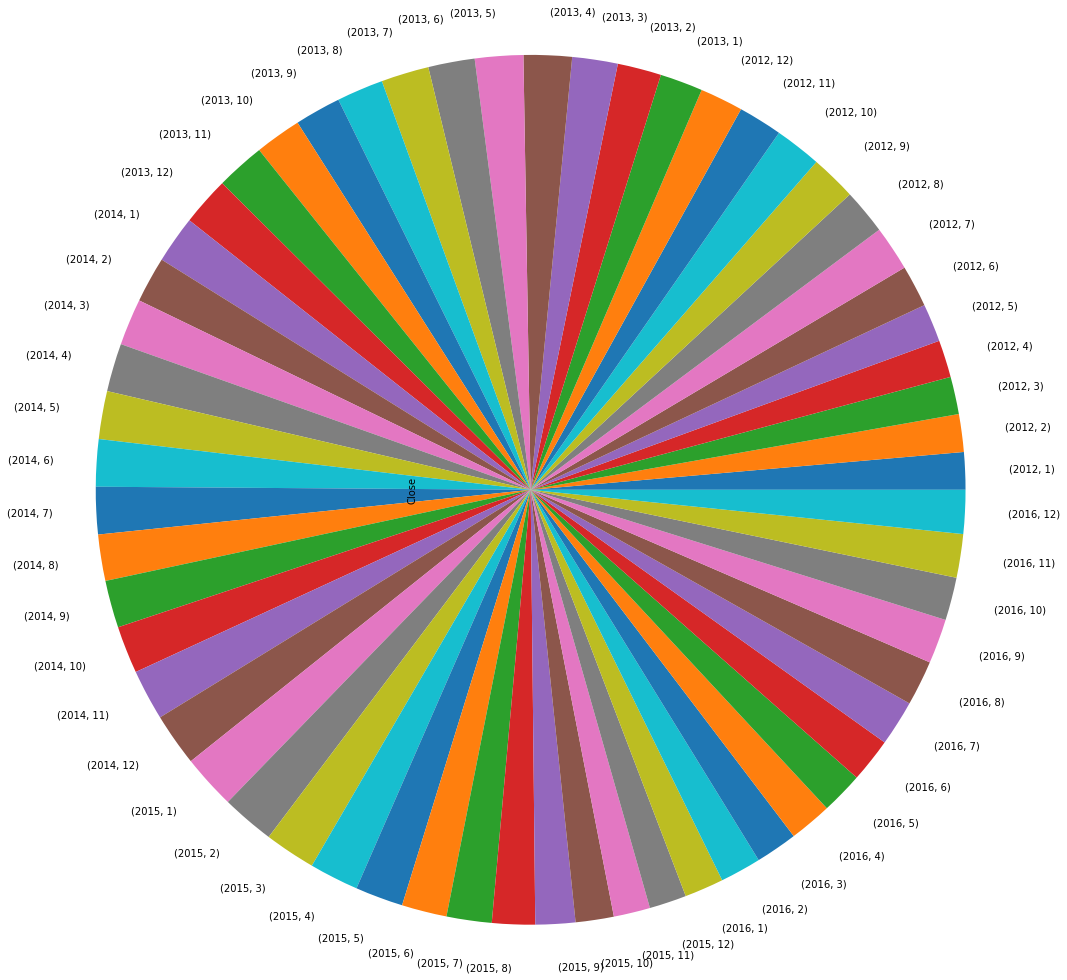

In [16]:
df.plot.pie(radius=5.0)

In [17]:
df.plot